In [83]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

In [84]:
#Reading the training dataset

training_data = pd.read_excel("pokemon_data_science.xlsx")

In [85]:
# EDA process starts
# Using describe method to describe the dataframe
# Useful to find out range variation and distribution of data 
training_data.describe()


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [86]:
# Counting the number of null values present in every column
# No null values present in the data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           644 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  Egg_Group_2       191 non-null    object 
 1

In [87]:
# It is useful to detect and drop duplicate rows to reduce unnecessory noice

duplicate_rows = training_data[training_data.duplicated()]
print("Number of duplicate rows :", duplicate_rows.shape)

Number of duplicate rows : (0, 23)


No duplicate row is present in a dataset

In [88]:
# Fields required for the further analysis
training_data_new = training_data.copy()
training_data_new.drop(columns = ['Number','Name','Type_2','Total','Egg_Group_2','Pr_Male','Catch_Rate'], inplace=True)
training_data_new.head()

,Type_1,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Body_Style,isLegendary
0,Grass,45,49,49,65,65,45,1,Green,True,Monster,False,0.71,6.9,quadruped,False
1,Grass,60,62,63,80,80,60,1,Green,True,Monster,False,0.99,13.0,quadruped,False
2,Grass,80,82,83,100,100,80,1,Green,True,Monster,True,2.01,100.0,quadruped,False
3,Fire,39,52,43,60,50,65,1,Red,True,Monster,False,0.61,8.5,bipedal_tailed,False
4,Fire,58,64,58,80,65,80,1,Red,True,Monster,False,1.09,19.0,bipedal_tailed,False


In [89]:
# Label encoding to label the target labels 
le = preprocessing.LabelEncoder()
for col in training_data_new.columns:
    if training_data_new.dtypes[col] == 'object':
        training_data_new[col] = le.fit_transform(training_data_new[col])

In [90]:
# Selecting the fields for input/reponse variable
X = training_data_new.iloc[:,:-2]
X.head()

,Type_1,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg
0,9,45,49,49,65,65,45,1,3,True,10,False,0.71,6.9
1,9,60,62,63,80,80,60,1,3,True,10,False,0.99,13.0
2,9,80,82,83,100,100,80,1,3,True,10,True,2.01,100.0
3,6,39,52,43,60,50,65,1,7,True,10,False,0.61,8.5
4,6,58,64,58,80,65,80,1,7,True,10,False,1.09,19.0


In [91]:
# Selecting the fields for predict variable
Y = training_data_new.iloc[:,-1]
Y.head()

0    False
1    False
2    False
3    False
4    False
Name: isLegendary, dtype: bool

[[-60.29130253  18.85963406]
 [-43.85527346 -11.97531953]
 [ 53.44038494 -33.32679832]
 ...
 [-18.22441807 -72.43873417]
 [-23.42369876 -98.74310176]
 [156.03324632 -31.43066124]]


<AxesSubplot:xlabel='Component1', ylabel='Component2'>

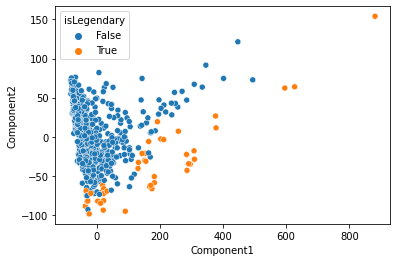

In [92]:
# Visualized with the help of PCA to understand the data
pca = PCA(n_components=2)
pca_= pca.fit_transform(X)
print(pca_)

pca_df = pd.DataFrame(data = pca_, columns =['Component1','Component2'])
#print(Y)
pca_df['isLegendary'] = Y

sns.scatterplot(data = pca_df, x= 'Component1', y='Component2', hue='isLegendary')

In [93]:
# Selecting k best features from all the available features for training the data

select = SelectKBest(score_func = chi2, k = 9)
z = select.fit(X,Y)
filter1 = select.get_support(indices = True)

# print(filter1)
df_sel_feature = X.iloc[:, filter1]
# print(X)
df_sel_feature.head()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Egg_Group_1,Height_m,Weight_kg
0,45,49,49,65,65,45,10,0.71,6.9
1,60,62,63,80,80,60,10,0.99,13.0
2,80,82,83,100,100,80,10,2.01,100.0
3,39,52,43,60,50,65,10,0.61,8.5
4,58,64,58,80,65,80,10,1.09,19.0


In [94]:
#  Splitting data arrays into two subsets: for training data and for testing data.  

X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(df_sel_feature, Y, test_size=0.33, random_state=42)

In [95]:
# Function for confusion matrix
def print_confusion_matrix(Actual, Predicted):
    print(confusion_matrix(Actual, Predicted))
    
# Function for accuracy
def print_accuracy(Actual, Predicted):
    accuracy = accuracy_score(Actual, Predicted)
    print("Accuracy is {:.2f}:".format(accuracy*100))

In [96]:
# RandomForestClassifer model used for training and predicting the data
# By setting CV = 5 will create 5 folds for cross validation, to find out the training data accuracy as data is split 
# into K number of sections/folds where each fold is used as a testing set at some point.

rfc_feature = RandomForestClassifier()
scores_random_forest = cross_val_score(rfc_feature, X_train_feature, y_train_feature, cv=5)
# print(scores_random_forest)
print("Validation accuracy: {:.2f}".format(np.mean(scores_random_forest)*100))
rfc_feature.fit(X_train_feature, y_train_feature)


Validation accuracy: 96.69


RandomForestClassifier()

In [97]:
predicted_output = rfc_feature.predict(X_test_feature)
print_confusion_matrix(y_test_feature, predicted_output)
print_accuracy(y_test_feature, predicted_output)

[[226   1]
 [  0  11]]
Accuracy is 99.58:
